# Clasificacion de Letras Escritas a Mano con Redes Neuronales

Comencemos cargando y preparando las herramientas que necesitamos:

In [4]:
print("Instalando librer√≠as necesarias...")
!pip install opencv-python-headless seaborn tensorflow-datasets
print("Librer√≠as instaladas.")

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
import os
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("\n¬°Herramientas cargadas!")

Instalando librer√≠as necesarias...
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.3/5.3 MB 96.7 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.2/2.2 MB 92.3 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 112.8/112.8 kB 24.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 152.9/152.9 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 167.6/167.6 kB 30.8 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 64.4/64.

## Paso 1: Cargar y Explorar los Datos de Letras Escritas (EMNIST)

Vamos a cargar un dataset llamado EMNIST (Extended MNIST), que contiene im√°genes de letras. Este conjunto de datos nos ayudar√° a entrenar nuestra red neuronal para que reconozca letras escritas a mano.

In [7]:
print("\nDescargando y cargando el dataset EMNIST/Letters. ¬°Esto puede tardar unos minutos la primera vez!")
datos, metadatos = tfds.load('emnist/letters', as_supervised=True, with_info=True)
print("Dataset EMNIST/Letters cargado.")

# Generamos una lista de nombres de las clases (letras)
nombres_clases = [chr(i + ord('a') - 1) for i in range(1, 27)]  # 'a' a 'z'
print("\nNombres de las clases (letras):", nombres_clases)


Dl Size...:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 282/535 [00:04<00:04, 62.99 MiB/s]

Dl Size...:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 283/535 [00:04<00:04, 62.99 MiB/s]

Dl Size...:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 284/535 [00:04<00:03, 62.99 MiB/s]

Dl Size...:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 285/535 [00:04<00:03, 62.99 MiB/s]

Dl Size...:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 286/535 [00:04<00:03, 62.99 MiB/s]

Dl Size...:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 287/535 [00:04<00:03, 62.99 MiB/s]

Dl Size...:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 288/535 [00:04<00:03, 62.99 MiB/s]

Dl Size...:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 289/535 [00:04<00:03, 62.99 MiB/s]

Dl Size...:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 290/535 [00:04<00:03, 62.99 MiB/s]

Dl Size...:  54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 291/535 [00:04<00:03, 62.99 MiB/s]

Dl Size...:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 292/535 [00:04<00:03, 62.99 MiB/s]

Dl Size...:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 293/535 [00:04<00:03, 62.99 MiB/s]

Dl Size...:  55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 294/535 [00:04<00:03, 62.99 MiB/s]

## Paso 2: Preprocesamiento de los Datos

Las im√°genes originales tienen valores de p√≠xeles entre 0 y 255. Para trabajar con redes neuronales, es mejor normalizarlos a una escala de 0 a 1.
Adem√°s, ajustaremos las etiquetas de forma que comiencen desde 0.

In [10]:
# Definimos una funci√≥n simple para aplicar estos dos pasos:
def preprocesar_imagen(imagen, etiqueta):
  # 1. Normalizar p√≠xeles: Convertir a decimal y dividir por 255.
  imagen = tf.cast(imagen, tf.float32) / 255.0
  # 2. Ajustar etiqueta: Restar 1 para empezar desde 0.
  etiqueta = etiqueta - 1
  return imagen, etiqueta # Devuelve la imagen y etiqueta procesadas.

# Aplicamos esta funci√≥n a todas las im√°genes del dataset.
# Separamos en datos para 'entrenamiento' y datos para 'prueba'.
# .map(): Aplica nuestra funci√≥n de preprocesamiento a cada elemento.
# .cache(): Almacena los resultados en memoria para acelerar el acceso futuro.
datos_entrenamiento = datos['train'].map(preprocesar_imagen).cache()
datos_pruebas = datos['test'].map(preprocesar_imagen).cache()

print("\n¬°Datos preprocesados! Listos para ser utilizados por la red neuronal.")


¬°Datos preprocesados! Listos para ser utilizados por la red neuronal.


## Paso 3: Visualizaci√≥n de Datos

Antes de avanzar, visualicemos c√≥mo se ven las letras en nuestros datos normalizados. Esto nos dar√° una mejor idea de lo que estamos trabajando.

2025-06-16 22:09:10.220787: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-06-16 22:09:10.222621: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


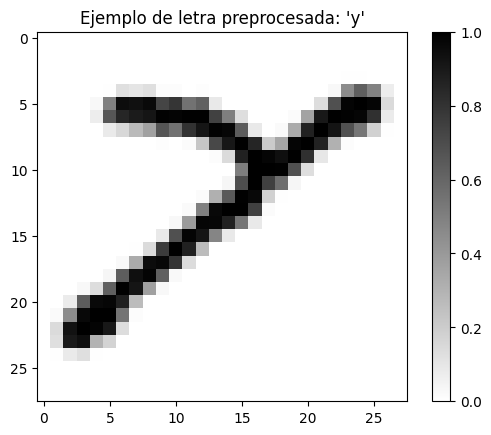

In [13]:
# Extraemos un ejemplo del conjunto de entrenamiento.
for imagen, etiqueta in datos_entrenamiento.take(1):
  # Convertimos los datos a un formato que Matplotlib pueda dibujar.
  imagen_a_mostrar = imagen.numpy()
  etiqueta_numerica = etiqueta.numpy()

# Creamos la visualizaci√≥n.
plt.figure()
# Mostramos la imagen. cmap=plt.cm.binary indica escala de grises.
# Accedemos al contenido de la imagen con [:, :, 0].
plt.imshow(imagen_a_mostrar[:, :, 0], cmap=plt.cm.binary)
# A√±adimos un t√≠tulo descriptivo usando nuestra lista de nombres_clases.
plt.title(f"Ejemplo de letra preprocesada: '{nombres_clases[etiqueta_numerica]}'")
plt.colorbar() # Muestra la escala de valores (0 a 1).
plt.grid(False) # Ocultamos la cuadr√≠cula para mayor claridad.
plt.show() # Mostramos el gr√°fico.

## Paso 4: Construir el Modelo de Red Neuronal

Ahora que tenemos nuestros datos listos, es momento de construir nuestra red neuronal. Utilizaremos un modelo simple llamado Perceptr√≥n Multicapa (MLP).

In [16]:
# Creamos un modelo secuencial (una pila de capas).
modelo = tf.keras.Sequential([
    # 1. Capa Flatten: Convierte la imagen 28x28 en un vector de 784.
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),

    # 2. Capas Ocultas (Dense): Con 64 neuronas cada una y activaci√≥n 'relu'.
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),

    # 3. Capa de Salida (Dense): 26 neuronas (una por letra), activaci√≥n 'softmax'.
    tf.keras.layers.Dense(len(nombres_clases), activation='softmax')
])

# Compilamos el modelo, especificando c√≥mo debe aprender:
modelo.compile(
    optimizer='adam', # Algoritmo para ajustar el modelo ('Adam' es eficiente y popular).
    loss='sparse_categorical_crossentropy', # Funci√≥n para medir el error durante el entrenamiento.
    metrics=['accuracy'] # M√©trica para evaluar el rendimiento (porcentaje de aciertos).
)

print("\n¬°Modelo de Red Neuronal construido y compilado! Listo para el entrenamiento.")
# Si quieren ver detalles t√©cnicos de las capas (par√°metros, etc.), pueden descomentar:
modelo.summary()


¬°Modelo de Red Neuronal construido y compilado! Listo para el entrenamiento.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 26)                1690      
                                                                 
Total params: 56090 (219.10 KB)
Trainable params: 56090 (219.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Paso 5: Preparar los Datos para el Entrenamiento

Para entrenar el modelo, necesitamos preparar nuestros datos en lotes eficientes.
Tambi√©n es com√∫n mezclar los datos para que el modelo no aprenda de un patr√≥n en espec√≠fico.

In [19]:
TAMANO_LOTE = 32 # N√∫mero de im√°genes que el modelo ver√° en cada paso de entrenamiento.

# Obtenemos el n√∫mero total de ejemplos de entrenamiento para la mezcla.
num_ejemplos_entrenamiento = metadatos.splits['train'].num_examples

# Preparamos el dataset de entrenamiento:
# .shuffle(): Mezcla los datos aleatoriamente.
# .batch(): Agrupa los datos en lotes del tama√±o especificado.
# .repeat(): Permite al proceso de entrenamiento iterar sobre los datos m√∫ltiples veces (√©pocas).
datos_entrenamiento = datos_entrenamiento.shuffle(num_ejemplos_entrenamiento).batch(TAMANO_LOTE).repeat()

# Preparamos el dataset de pruebas: solo necesitamos agruparlo en lotes.
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

print(f"\nDatos organizados en lotes de {TAMANO_LOTE} para un entrenamiento eficiente.")


Datos organizados en lotes de 32 para un entrenamiento eficiente.


## Paso 6: ¬°Entrenar el Modelo!

Ahora lleg√≥ el momento de entrenar la red neuronal. Este proceso permitir√° que el modelo aprenda a reconocer letras.

In [22]:
# Definimos cu√°ntas √©pocas (pasadas completas) de entrenamiento realizaremos.
# Entre 5 y 10 suele ser suficiente para ver un aprendizaje significativo en este problema.
EPOCAS = 15

print(f"\nIniciando el entrenamiento por {EPOCAS} √©pocas...")
print("Observen c√≥mo la 'accuracy' (precisi√≥n) deber√≠a mejorar con cada √©poca.")

# Ejecutamos el entrenamiento con model.fit()
historial = modelo.fit(
    datos_entrenamiento, # Los datos preprocesados para entrenar.
    epochs=EPOCAS, # El n√∫mero de pasadas completas.
    # steps_per_epoch indica cu√°ntos lotes procesar por √©poca para cubrir aprox. todo el dataset.
    steps_per_epoch=math.ceil(num_ejemplos_entrenamiento / TAMANO_LOTE)
    # Opcional: Podemos a√±adir 'validation_data=datos_pruebas' para ver el rendimiento
    # en los datos de prueba despu√©s de cada √©poca, lo cual es muy informativo.
)

print("\n¬°Entrenamiento completado! üéâ El modelo ha finalizado su proceso de aprendizaje.")


Iniciando el entrenamiento por 15 √©pocas...
Observen c√≥mo la 'accuracy' (precisi√≥n) deber√≠a mejorar con cada √©poca.
Epoch 1/15
2775/2775 [==============================] - 15s 2ms/step - loss: 0.8805 - accuracy: 0.7404
Epoch 2/15
2775/2775 [==============================] - 6s 2ms/step - loss: 0.5106 - accuracy: 0.8422
Epoch 3/15
2775/2775 [==============================] - 6s 2ms/step - loss: 0.4238 - accuracy: 0.8676
Epoch 4/15
2775/2775 [==============================] - 7s 2ms/step - loss: 0.3797 - accuracy: 0.8797
Epoch 5/15
2775/2775 [==============================] - 6s 2ms/step - loss: 0.3482 - accuracy: 0.8876
Epoch 6/15
2775/2775 [==============================] - 6s 2ms/step - loss: 0.3278 - accuracy: 0.8940
Epoch 7/15
2775/2775 [==============================] - 7s 3ms/step - loss: 0.3100 - accuracy: 0.8988
Epoch 8/15
2775/2775 [==============================] - 6s 2ms/step - loss: 0.2963 - accuracy: 0.9023
Epoch 9/15
2775/2775 [==============================] - 6s 2m

## Paso 7: Evaluar el Modelo

Una vez que el modelo ha sido entrenado, es importante evaluarlo con datos que no ha visto antes. Esto nos dir√° qu√© tan bien est√° funcionando.

In [25]:
print("\nEvaluando el rendimiento del modelo con datos nuevos (conjunto de prueba)...")
# Usamos model.evaluate() para calcular la p√©rdida y precisi√≥n en el conjunto de prueba.
loss_prueba, accuracy_prueba = modelo.evaluate(datos_pruebas)

print(f"\nResultados de la Evaluaci√≥n:")
print(f"  - P√©rdida (Loss) en prueba: {loss_prueba:.4f}")
print(f"  - Precisi√≥n (Accuracy) en prueba: {accuracy_prueba:.4f} (Equivalente a {accuracy_prueba*100:.2f}%)")

if accuracy_prueba > 0.80:
    print("\n¬°Excelente resultado! Una precisi√≥n superior al 80% en datos no vistos indica un buen aprendizaje y generalizaci√≥n. üëç")
elif accuracy_prueba > 0.65:
    print("\n¬°Buen resultado! Superar el 65% muestra que el modelo ha captado patrones importantes. ¬°Un s√≥lido punto de partida! üòä")
else:
    print("\nEl modelo ha aprendido, pero hay margen de mejora. ¬°Parte del proceso es experimentar para optimizar! üí™")


Evaluando el rendimiento del modelo con datos nuevos (conjunto de prueba)...
463/463 [==============================] - 4s 5ms/step - loss: 0.4232 - accuracy: 0.8760

Resultados de la Evaluaci√≥n:
  - P√©rdida (Loss) en prueba: 0.4232
  - Precisi√≥n (Accuracy) en prueba: 0.8760 (Equivalente a 87.60%)

¬°Excelente resultado! Una precisi√≥n superior al 80% en datos no vistos indica un buen aprendizaje y generalizaci√≥n. üëç


##Paso 7.5: Visualizando la Curva de Aprendizaje üìà

El objeto historial que guardamos durante el entrenamiento (modelo.fit) contiene informaci√≥n valiosa sobre c√≥mo evolucionaron las m√©tricas (como la precisi√≥n y la p√©rdida) en cada √©poca. Graficar esto nos da una visi√≥n clara del proceso de aprendizaje.


--- Visualizando el Proceso de Aprendizaje ---


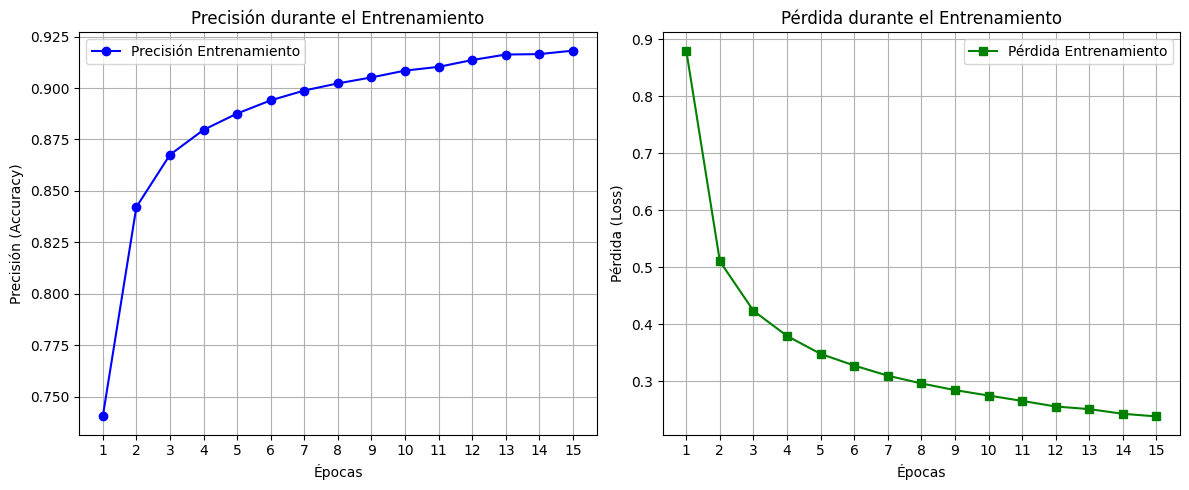


An√°lisis de las Curvas:
- Idealmente, la Precisi√≥n de Entrenamiento debe subir y la P√©rdida debe bajar.
- Estas curvas nos ayudan a decidir si necesitamos m√°s/menos √©pocas, regularizaci√≥n, etc.


In [28]:
print("\n--- Visualizando el Proceso de Aprendizaje ---")

# El objeto 'historial' tiene un diccionario llamado 'history' con las m√©tricas por √©poca.
# Las claves t√≠picas son 'loss', 'accuracy'. Si usamos datos de validaci√≥n,
# tambi√©n tendr√≠amos 'val_loss' y 'val_accuracy'.

# Extraemos las m√©tricas del historial.
historial_dict = historial.history
epocas_rango = range(1, EPOCAS + 1) # Creamos una secuencia de n√∫meros para el eje X (las √©pocas)

# Graficar la Precisi√≥n (Accuracy)
plt.figure(figsize=(12, 5)) # Creamos una figura para los gr√°ficos

plt.subplot(1, 2, 1) # Definimos el primer subgr√°fico (1 fila, 2 columnas, posici√≥n 1)
plt.plot(epocas_rango, historial_dict['accuracy'], 'bo-', label='Precisi√≥n Entrenamiento') # 'bo-' = puntos azules conectados
# Si hubi√©ramos usado datos de validaci√≥n en fit(), podr√≠amos a√±adir la curva de validaci√≥n:
# if 'val_accuracy' in historial_dict:
#    plt.plot(epocas_rango, historial_dict['val_accuracy'], 'ro-', label='Precisi√≥n Validaci√≥n')
plt.title('Precisi√≥n durante el Entrenamiento')
plt.xlabel('√âpocas')
plt.ylabel('Precisi√≥n (Accuracy)')
plt.xticks(epocas_rango) # Asegura que se muestren todas las √©pocas en el eje X
plt.legend() # Muestra la leyenda ('Precisi√≥n Entrenamiento', etc.)
plt.grid(True) # A√±ade una grilla para facilitar la lectura

# Graficar la P√©rdida (Loss)
plt.subplot(1, 2, 2) # Definimos el segundo subgr√°fico (1 fila, 2 columnas, posici√≥n 2)
plt.plot(epocas_rango, historial_dict['loss'], 'gs-', label='P√©rdida Entrenamiento') # 'gs-' = cuadrados verdes conectados
# Si hubi√©ramos usado datos de validaci√≥n en fit():
# if 'val_loss' in historial_dict:
#    plt.plot(epocas_rango, historial_dict['val_loss'], 'rs-', label='P√©rdida Validaci√≥n')
plt.title('P√©rdida durante el Entrenamiento')
plt.xlabel('√âpocas')
plt.ylabel('P√©rdida (Loss)')
plt.xticks(epocas_rango)
plt.legend()
plt.grid(True)

plt.tight_layout() # Ajusta el espaciado entre los subgr√°ficos
plt.show()

print("\nAn√°lisis de las Curvas:")
print("- Idealmente, la Precisi√≥n de Entrenamiento debe subir y la P√©rdida debe bajar.")
# Si tuvi√©ramos curvas de validaci√≥n:
# print("- Si la Precisi√≥n de Validaci√≥n se estanca o baja mientras la de Entrenamiento sigue subiendo,")
# print("  podr√≠a ser un signo de 'sobreajuste' (overfitting): el modelo memoriza los datos de entrenamiento")
# print("  pero no generaliza bien a datos nuevos.")
# print("- De forma similar, si la P√©rdida de Validaci√≥n empieza a subir, tambi√©n indica posible sobreajuste.")
print("- Estas curvas nos ayudan a decidir si necesitamos m√°s/menos √©pocas, regularizaci√≥n, etc.")

## Paso 8: Visualizar Predicciones

Ahora viene la parte divertida y visual. Vamos a ver qu√© predice la red para algunas im√°genes de prueba y si acert√≥ o no. ¬°Vamos a usar unas funciones para graficar esto de forma clara!

1/1 [==============================] - 0s 104ms/step


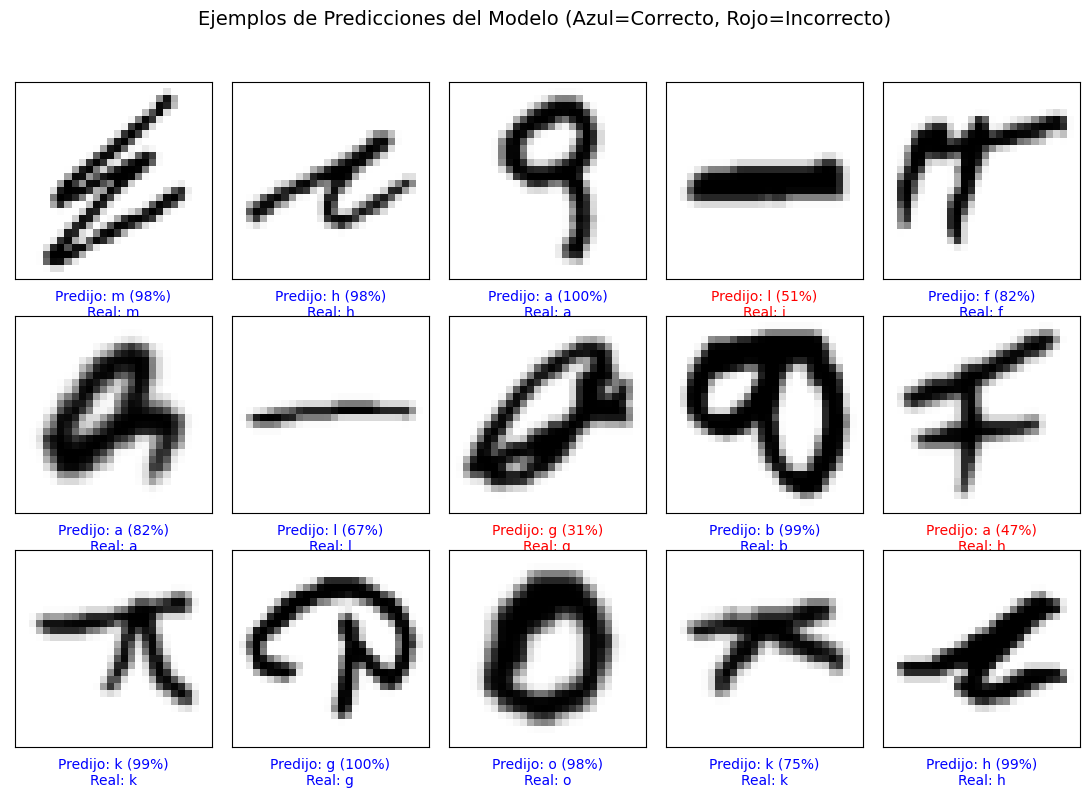

In [31]:
# Tomamos un lote de im√°genes y etiquetas del conjunto de prueba.
for imagenes_lote_prueba, etiquetas_lote_prueba in datos_pruebas.take(1):
    imagenes_a_predecir = imagenes_lote_prueba.numpy()
    etiquetas_reales = etiquetas_lote_prueba.numpy()
    # Pedimos al modelo que genere las predicciones (probabilidades para cada letra).
    predicciones_probabilidades = modelo.predict(imagenes_a_predecir)
    break # Solo necesitamos un lote para visualizar.

# Funci√≥n auxiliar para graficar una imagen con su predicci√≥n.
def graficar_prediccion(indice, probabilidades, etiquetas_verdaderas, imagenes):
    probabilidad_predicha = probabilidades[indice]
    etiqueta_verdadera = etiquetas_verdaderas[indice]
    imagen = imagenes[indice]

    plt.grid(False); plt.xticks([]); plt.yticks([]) # Limpiamos ejes y grilla
    plt.imshow(imagen[:, :, 0], cmap=plt.cm.binary) # Mostramos imagen

    # Encontramos la letra con la mayor probabilidad asignada por el modelo.
    indice_predicho = np.argmax(probabilidad_predicha)
    letra_predicha = nombres_clases[indice_predicho]
    letra_real = nombres_clases[etiqueta_verdadera]

    # Asignamos color seg√∫n si la predicci√≥n fue correcta o no.
    color = 'blue' if indice_predicho == etiqueta_verdadera else 'red'

    # A√±adimos etiqueta con la predicci√≥n, confianza y valor real.
    plt.xlabel(f"Predijo: {letra_predicha} ({100*np.max(probabilidad_predicha):.0f}%)\nReal: {letra_real}", color=color)

# Mostramos un conjunto de predicciones.
num_filas = 3
num_columnas = 5
num_imagenes_a_mostrar = num_filas * num_columnas

plt.figure(figsize=(2 * num_columnas + 1, 2 * num_filas + 2)) # Ajustamos tama√±o figura
plt.suptitle("Ejemplos de Predicciones del Modelo (Azul=Correcto, Rojo=Incorrecto)", fontsize=14)
for i in range(num_imagenes_a_mostrar):
    plt.subplot(num_filas, num_columnas, i + 1) # Creamos espacio para cada imagen
    graficar_prediccion(i, predicciones_probabilidades, etiquetas_reales, imagenes_a_predecir)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajustamos espaciado
plt.show()

## Paso 9: Analizando Errores con la Matriz de Confusi√≥n

Para entender mejor c√≥mo se comporta nuestra red, utilizaremos una Matriz de Confusi√≥n. Esto nos permitir√° visualizar d√≥nde se cometen errores.


Generando la Matriz de Confusi√≥n para analizar los errores...
(Requiere procesar todas las predicciones del conjunto de prueba, puede tardar unos instantes)


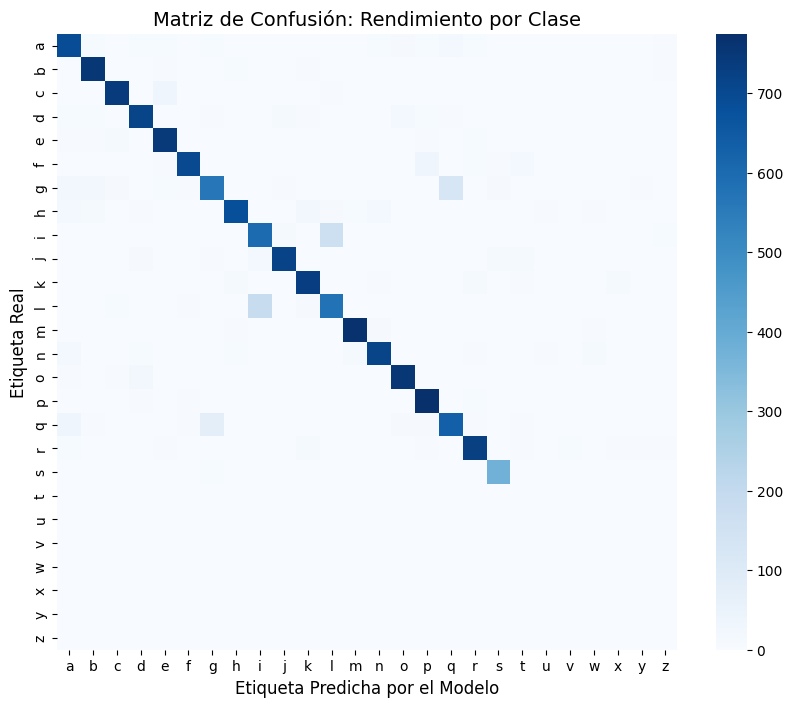


Interpretaci√≥n de la Matriz de Confusi√≥n:
- Cada fila representa las instancias de una letra REAL.
- Cada columna representa las predicciones hechas por el modelo para una letra.
- La DIAGONAL PRINCIPAL (de arriba-izquierda a abajo-derecha) muestra los ACIERTOS.
  (Casos donde la letra real 'X' fue clasificada como 'X'). Idealmente, esta diagonal es intensa (oscura).
- Los valores FUERA de la diagonal representan ERRORES (confusiones).
  (Por ejemplo, un valor en la fila 'i', columna 'l' indica cu√°ntas veces una 'i' real fue clasificada err√≥neamente como 'l').


In [34]:
print("\nGenerando la Matriz de Confusi√≥n para analizar los errores...")
print("(Requiere procesar todas las predicciones del conjunto de prueba, puede tardar unos instantes)")

# Necesitamos obtener las predicciones para TODO el conjunto de prueba.
indices_predichos_todos = []
etiquetas_reales_todas = []

# Iteramos sobre todos los lotes del conjunto de prueba.
for imagenes_lote, etiquetas_lote in datos_pruebas:
    # Obtenemos las predicciones de probabilidad.
    probs_lote = modelo.predict(imagenes_lote, verbose=0)
    # Obtenemos el √≠ndice de la clase m√°s probable para cada imagen.
    indices_predichos_lote = np.argmax(probs_lote, axis=1)
    # Acumulamos los resultados.
    indices_predichos_todos.extend(indices_predichos_lote)
    etiquetas_reales_todas.extend(etiquetas_lote.numpy())

# Convertimos a arrays de NumPy para la funci√≥n de la matriz.
indices_predichos_todos = np.array(indices_predichos_todos)
etiquetas_reales_todas = np.array(etiquetas_reales_todas)

# Calculamos la matriz de confusi√≥n.
matriz_conf = confusion_matrix(etiquetas_reales_todas, indices_predichos_todos)

# Visualizamos la matriz usando Seaborn para una mejor presentaci√≥n.
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_conf, annot=False, cmap='Blues', fmt='d', # annot=False si hay muchas clases
            xticklabels=nombres_clases, yticklabels=nombres_clases)
plt.xlabel('Etiqueta Predicha por el Modelo', fontsize=12)
plt.ylabel('Etiqueta Real', fontsize=12)
plt.title('Matriz de Confusi√≥n: Rendimiento por Clase', fontsize=14)
plt.show()

print("\nInterpretaci√≥n de la Matriz de Confusi√≥n:")
print("- Cada fila representa las instancias de una letra REAL.")
print("- Cada columna representa las predicciones hechas por el modelo para una letra.")
print("- La DIAGONAL PRINCIPAL (de arriba-izquierda a abajo-derecha) muestra los ACIERTOS.")
print("  (Casos donde la letra real 'X' fue clasificada como 'X'). Idealmente, esta diagonal es intensa (oscura).")
print("- Los valores FUERA de la diagonal representan ERRORES (confusiones).")
print("  (Por ejemplo, un valor en la fila 'i', columna 'l' indica cu√°ntas veces una 'i' real fue clasificada err√≥neamente como 'l').")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9be9d3e5-4f25-48e6-912d-b59b8644d952' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>